# Load the dataset

In [629]:
import pandas as pd
# Remove the limit on the number of columns displayed
pd.set_option('display.max_columns', None)

In [630]:
fact_table = pd.read_csv("fact_table.csv")

In [631]:
fact_table.tail(10)

,Unnamed: 0.2,Match ID,Team 1,Team 2,Team 1 Score,Team 2 Score,Winner,Prev Team 1 Played,Prev Team 1 Won,Prev Team 1 Drawn,Prev Team 1 Lost,Prev Team 1 Goals Scored,Prev Team 1 Goals Conceded,Prev Team 1 Goal Difference,Prev Team 1 Points,Prev Team 1 Form,Prev Team 2 Played,Prev Team 2 Won,Prev Team 2 Drawn,Prev Team 2 Lost,Prev Team 2 Goals Scored,Prev Team 2 Goals Conceded,Prev Team 2 Goal Difference,Prev Team 2 Points,Prev Team 2 Form,Date,Time,Wk,Day,xG,xG.1,Attendance,Venue,Referee,StadiumID,Latitude,Longitude,Datetime,Temperature,H2H_Team_1_Wins_Last_4,H2H_Team_2_Wins_Last_4,H2H_Draws_Last_4,Composite Key,team_2_code,team_1_code,team_1_xg,team_2_xg,is_result,has_data,url,team2_points,team2_expected_points,team2_np_xg,team2_np_xg_difference,team2_ppda,team2_deep_completions,team1_points,team1_expected_points,team1_np_xg,team1_np_xg_difference,team1_ppda,team1_deep_completions,gameweek,team_1_fdr,team_2_fdr,composite_key,B365H,B365D,B365A,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Cumulative_Avg_HST,Cumulative_Avg_AST,Cumulative_Avg_HF,Cumulative_Avg_AF,Cumulative_Avg_HC,Cumulative_Avg_AC,Cumulative_Avg_HY,Cumulative_Avg_AY,Cumulative_Avg_HR,Cumulative_Avg_AR,Unnamed: 0.1,Score,Away Win Odds,Home Win Odds,Draw Odds,Precipitation,Unnamed: 0,Cum Team 1 FDR,Cum Team 2 FDR,Avg Team 1 FDR,Avg Team 2 FDR,Cum PPDA Team 1,Cum PPDA Team 2,Avg PPDA Team 1,Avg PPDA Team 2,Cum Deep Completions Team 1,Cum Deep Completions Team 2,Avg Deep Completions Team 1,Avg Deep Completions Team 2,Weighted Avg PPDA Team 1,Weighted Avg PPDA Team 2,Weighted Avg Deep Completions Team 1,Weighted Avg Deep Completions Team 2,Cum xG,Avg xG,Weighted Avg xG,Cum xG.1,Avg xG.1,Weighted Avg xG.1,Cum xG Team 1,Cum xG Team 2,Avg xG Team 1,Avg xG Team 2,Weighted Avg xG Team 1,Weighted Avg xG Team 2,Cum np_xg,Avg team1_np_xg,Avg team2_np_xg,Weighted Avg team1_np_xg,Weighted Avg team2_np_xg,Cum expected_points,Avg team1_expected_points,Avg team2_expected_points,Weighted Avg team1_expected_points,Weighted Avg team2_expected_points,Cum Team 1 Won,Cum Team 2 Won,Avg Team 1 Won,Avg Team 2 Won,Cum Team 1 Drawn,Cum Team 2 Drawn,Avg Team 1 Drawn,Avg Team 2 Drawn,Cum Team 1 Lost,Cum Team 2 Lost,Avg Team 1 Lost,Avg Team 2 Lost,Cum Team 1 Goals Scored,Cum Team 2 Goals Scored,Avg Team 1 Goals Scored,Avg Team 2 Goals Scored,Cum Team 1 Goals Conceded,Cum Team 2 Goals Conceded,Avg Team 1 Goals Conceded,Avg Team 2 Goals Conceded,Cum Team 1 Goal Difference,Cum Team 2 Goal Difference,Avg Team 1 Goal Difference,Avg Team 2 Goal Difference,Cum Team 1 Points,Cum Team 2 Points,Avg Team 1 Points,Avg Team 2 Points,Sunset_Time,Match_Time_Category,ppg_team1,ppg_team2
149,149,497561,Arsenal,Everton,NaN,NaN,NaN,15,8,5,2,29,15,14,29,2.2,14,3,5,6,14,21,-7,14,1.0,2024-12-14,15:00:00,16,Sat,NaN,NaN,NaN,Emirates Stadium,NaN,3.0,51.5550,-0.1086,2024-12-14T15:00:00,NaN,0,0,0,2024-12-14_Arsenal_Everton,EVE,ARS,NaN,NaN,False,False,https://understat.com/match/26755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2,5,2024-12-14_Arsenal_Everton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.214286,3.857143,10.357143,10.142857,5.142857,4.785714,1.357143,1.357143,0.071429,0.071429,149.0,NaN,13.0,1.20,5.50,NaN,150.0,50,39,3.125000,2.6000,137.738852,208.573706,9.182590,14.898122,139.0,87.0,9.266667,6.214286,29.384288,36.181153,29.653333,15.091837,0,1.706667,5.333333,0,1.064286,2.767143,32.930493,17.093783,2.195366,1.220984,6.860519,3.174560,48.501936,2.093877,1.220984,6.543365,3.174560,44.3144,1.929520,1.097971,6.029750,2.854726,69,17,4.600000,1.214286,37,31,2.466667,2.214286,14,57,0.933333,4.071429,223,98,14.866667,7.000000,112,201,7.466667,14.357143,111,-103,7.400000,-7.357143,244,82,16.266667,5.857143,16:00:00,Daytime,1.933333,1.000000
150,150,497564,Liverpool,Fulham,NaN,NaN,NaN,14,11,2,1,29,11,18,35,2.6,15,6,5,4,22,20,2,23,1.6,2024-12-14,15:00:00,16,Sat,NaN,NaN,NaN,Anfield,NaN,20.0,53.4308,-2.9608,2024-12-14T15:00:00,NaN,0,0,0,2024-12-14_Liverpool_Fulham,FLH,LIV,NaN,NaN,False,False,https://understat.com/

In [632]:
# Re-import necessary libraries due to reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
fact_table['time_period_encoded'] = label_encoder.fit_transform(fact_table['Match_Time_Category'])

# Display the results
fact_table, dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


(     Unnamed: 0.2  Match ID           Team 1          Team 2  Team 1 Score  \
 0               0    497410   Manchester Utd          Fulham           1.0   
 1               1    497411     Ipswich Town       Liverpool           0.0   
 2               2    497412          Arsenal          Wolves           2.0   
 3               3    497413          Everton        Brighton           0.0   
 4               4    497414    Newcastle Utd     Southampton           1.0   
 ..            ...       ...              ...             ...           ...   
 154           154    497562         Brighton  Crystal Palace           NaN   
 155           155    497565  Manchester City  Manchester Utd           NaN   
 156           156    497563          Chelsea       Brentford           NaN   
 157           157    497568      Southampton       Tottenham           NaN   
 158           158    497560      Bournemouth        West Ham           NaN   
 
      Team 2 Score     Winner  Prev Team 1 Played 

In [633]:
dataset = fact_table[['Team 1 Score', 'Team 2 Score','Prev Team 1 Form','Prev Team 2 Form','Attendance','team1_points','Prev Team 2 Goal Difference',
'Prev Team 2 Points','Prev Team 2 Form','Cumulative_Avg_HST','Cumulative_Avg_AST','Cumulative_Avg_HF',	'Cumulative_Avg_AF',	
'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr','team_2_fdr', 'Cumulative_Avg_AY',	
'Cumulative_Avg_HR', 'Cumulative_Avg_AR','team2_expected_points', 
 # 'B365H', 'B365D', 'B365A', 
'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 'H2H_Draws_Last_4',
 'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2', 
'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1', 
'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1', 'Weighted Avg Deep Completions Team 2', 
'Avg xG', 'Weighted Avg xG', 'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg', 'Avg team1_np_xg', 'Avg team2_np_xg', 
'Weighted Avg team1_np_xg', 'Weighted Avg team2_np_xg',  'Avg team1_expected_points', 
'Avg team2_expected_points', 'Weighted Avg team1_expected_points', 'Weighted Avg team2_expected_points',
'Avg Team 1 Won', 'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn', 'Avg Team 1 Lost', 'Avg Team 2 Lost',
'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded', 'Avg Team 2 Goals Conceded', 
'Avg Team 1 Goal Difference','Avg Team 2 Goal Difference', 'time_period_encoded', 'ppg_team1', 'ppg_team2']]

In [634]:
prediction_dataset = fact_table[['Team 1', 'Team 2'] + list(dataset.columns)].tail(10)

In [635]:
prediction_dataset.head(10)

,Team 1,Team 2,Team 1 Score,Team 2 Score,Prev Team 1 Form,Prev Team 2 Form,Attendance,team1_points,Prev Team 2 Goal Difference,Prev Team 2 Points,Prev Team 2 Form,Cumulative_Avg_HST,Cumulative_Avg_AST,Cumulative_Avg_HF,Cumulative_Avg_AF,Cumulative_Avg_HC,Cumulative_Avg_AC,Cumulative_Avg_HY,team_1_fdr,team_2_fdr,Cumulative_Avg_AY,Cumulative_Avg_HR,Cumulative_Avg_AR,team2_expected_points,B365H,B365D,B365A,H2H_Team_1_Wins_Last_4,H2H_Team_2_Wins_Last_4,H2H_Draws_Last_4,Cum PPDA Team 2,Avg PPDA Team 1,Avg PPDA Team 2,Avg Deep Completions Team 1,Avg Deep Completions Team 2,Weighted Avg PPDA Team 1,Weighted Avg PPDA Team 2,Weighted Avg Deep Completions Team 1,Weighted Avg Deep Completions Team 2,Avg xG,Weighted Avg xG,Avg xG.1,Weighted Avg xG.1,Avg xG Team 1,Avg xG Team 2,Weighted Avg xG Team 1,Weighted Avg xG Team 2,Cum np_xg,Avg team1_np_xg,Avg team2_np_xg,Weighted Avg team1_np_xg,Weighted Avg team2_np_xg,Avg team1_expected_points,Avg team2_expected_points,Weighted Avg team1_expected_points,Weighted Avg team2_expected_points,Avg Team 1 Won,Avg Team 2 Won,Avg Team 1 Drawn,Avg Team 2 Drawn,Avg Team 1 Lost,Avg Team 2 Lost,Avg Team 1 Goals Scored,Avg Team 2 Goals Scored,Avg Team 1 Goals Conceded,Avg Team 2 Goals Conceded,Avg Team 1 Goal Difference,Avg Team 2 Goal Difference,time_period_encoded,ppg_team1,ppg_team2
149,Arsenal,Everton,NaN,NaN,2.2,1.0,NaN,NaN,-7,14,1.0,4.214286,3.857143,10.357143,10.142857,5.142857,4.785714,1.357143,2,5,1.357143,0.071429,0.071429,NaN,NaN,NaN,NaN,0,0,0,208.573706,9.182590,14.898122,9.266667,6.214286,29.384288,36.181153,29.653333,15.091837,1.706667,5.333333,1.064286,2.767143,2.195366,1.220984,6.860519,3.174560,48.501936,2.093877,1.220984,6.543365,3.174560,1.929520,1.097971,6.029750,2.854726,4.600000,1.214286,2.466667,2.214286,0.933333,4.071429,14.866667,7.000000,7.466667,14.357143,7.400000,-7.357143,0,1.933333,1.000000
150,Liverpool,Fulham,NaN,NaN,2.6,1.6,NaN,NaN,2,23,1.6,5.000000,3.866667,10.066667,11.600000,5.733333,5.200000,2.266667,2,5,1.733333,0.133333,0.133333,NaN,NaN,NaN,NaN,0,0,0,176.985350,10.030246,11.799023,10.071429,5.866667,29.374291,32.250664,29.494898,16.035556,2.028571,5.815238,1.373333,3.948333,2.409830,1.651905,6.908179,4.749228,53.949182,2.192353,1.550416,6.284745,4.457446,2.235021,1.675547,6.407061,4.817197,6.214286,3.200000,0.500000,2.400000,0.785714,2.400000,14.714286,11.000000,3.785714,10.066667,10.928571,0.933333,0,2.500000,1.533333
151,Newcastle Utd,Leicester City,NaN,NaN,1.0,0.8,NaN,NaN,-9,14,0.8,4.333333,5.133333,11.400000,11.066667,4.933333,5.666667,2.400000,2,4,2.266667,0.133333,0.000000,NaN,NaN,NaN,NaN,0,0,0,195.632016,10.835365,13.042134,7.533333,4.933333,33.228452,36.517976,23.102222,13.813333,1.433333,4.300000,1.080000,3.105000,1.402115,1.293649,4.206345,3.719242,37.391796,1.300626,1.192161,3.901877,3.427462,1.234353,0.841720,3.703060,2.419945,3.400000,1.266667,2.533333,3.000000,2.066667,3.733333,9.266667,10.533333,8.666667,15.066667,0.600000,-4.533333,0,1.333333,0.933333
152,Wolves,Ipswich Town,NaN,NaN,1.2,0.8,NaN,NaN,-13,9,0.8,4.933333,4.000000,10.600000,13.400000,6.266667,5.666667,2.000000,2,2,2.200000,0.066667,0.066667,NaN,NaN,NaN,NaN,0,0,0,200.574321,12.566591,13.371621,5.200000,4.333333,39.375318,37.440540,16.293333,12.133333,1.020000,3.123750,0.940000,2.585000,1.088662,1.184411,3.334027,3.257131,34.096099,1.088662,1.184411,3.334027,3.257131,0.915980,0.724433,2.805189,1.992192,0.600000,0.333333,1.733333,3.733333,5.666667,3.933333,11.200000,7.266667,21.133333,15.466667,-9.933333,-8.200000,0,0.600000,0.600000
153,Nottingham Forest,Aston Villa,NaN,NaN,1.2,1.4,NaN,NaN,0,25,1.4,5.200000,3.133333,12.466667,13.400000,6.533333,4.000000,2.333333,3,2,3.133333,0.066667,0.066667,NaN,NaN,NaN,NaN,0,0,0,203.509756,15.647694,13.567317,6.133333,8.000000,45.899902,37.988488,17.991111,22.400000,1.193333,3.505417,1.666667,4.583333,1.422717,2.038115,4.179232,5.604816,48.867804,1.321228,1.936625,3.881108,5.325720,1.409567,1.761193,4.140602,4.843282,3.400000,4.133333,3.200000,2.000000,1.4000

In [636]:
dataset = dataset.iloc[10:-10]
df = dataset

In [637]:
df['time_period_encoded']

10     0
11     0
12     0
13     0
14     0
      ..
144    0
145    0
146    0
147    1
148    1
Name: time_period_encoded, Length: 139, dtype: int64

In [638]:
df.columns

Index(['Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form', 'Prev Team 2 Form',
       'Attendance', 'team1_points', 'Prev Team 2 Goal Difference',
       'Prev Team 2 Points', 'Prev Team 2 Form', 'Cumulative_Avg_HST',
       'Cumulative_Avg_AST', 'Cumulative_Avg_HF', 'Cumulative_Avg_AF',
       'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY',
       'team_1_fdr', 'team_2_fdr', 'Cumulative_Avg_AY', 'Cumulative_Avg_HR',
       'Cumulative_Avg_AR', 'team2_expected_points', 'B365H', 'B365D', 'B365A',
       'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 'H2H_Draws_Last_4',
       'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2',
       'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2',
       'Weighted Avg PPDA Team 1', 'Weighted Avg PPDA Team 2',
       'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
       'Weig

In [639]:
df.to_csv("modelling_table.csv")

In [640]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline



# # Clean the data if necessary
# data = data.iloc[10:]  # Remove initial rows if they're not needed

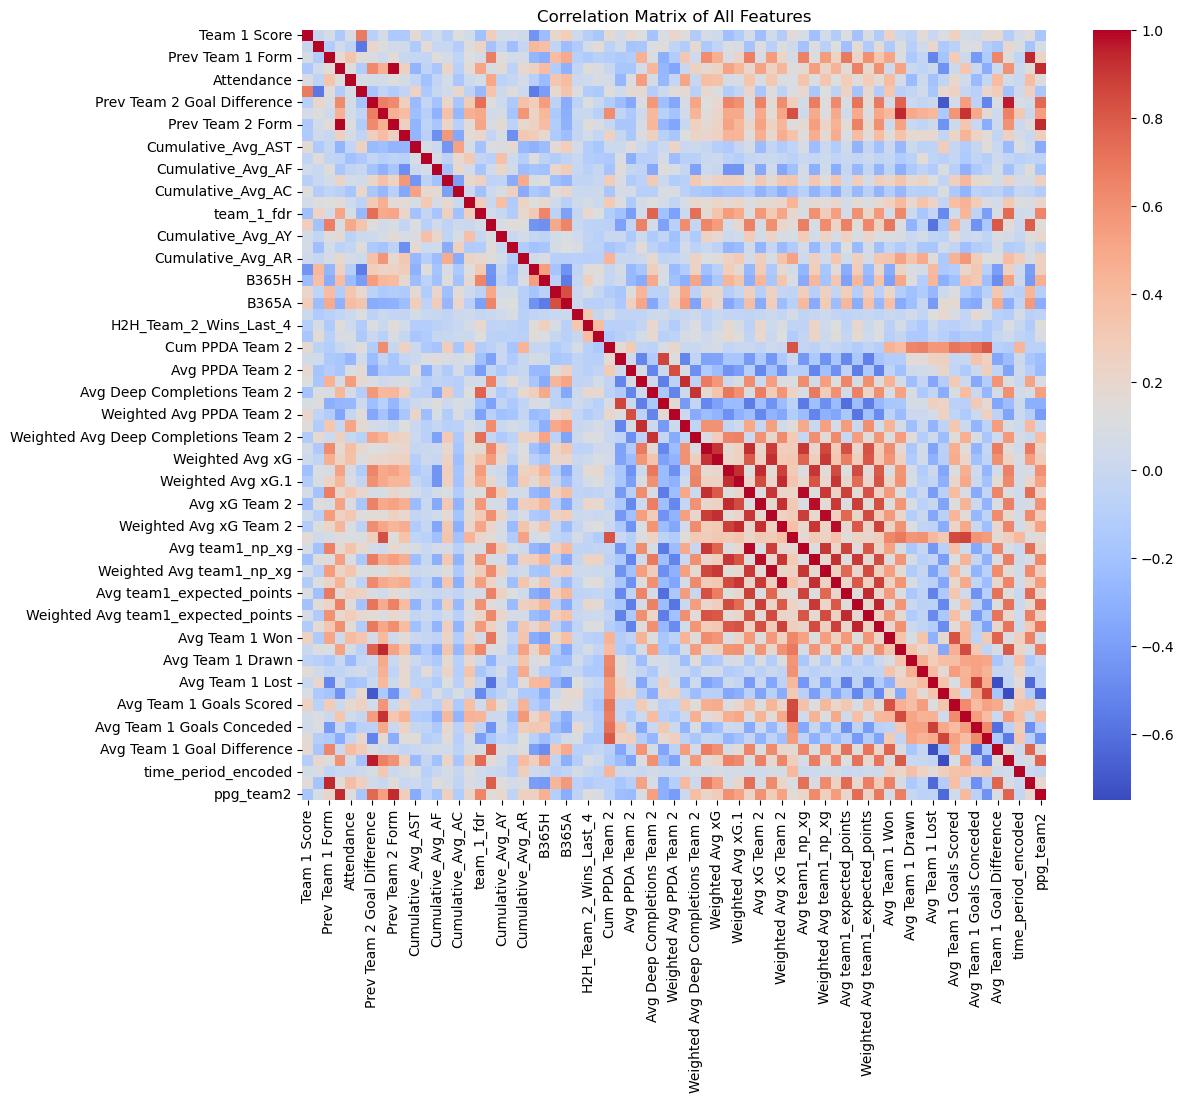

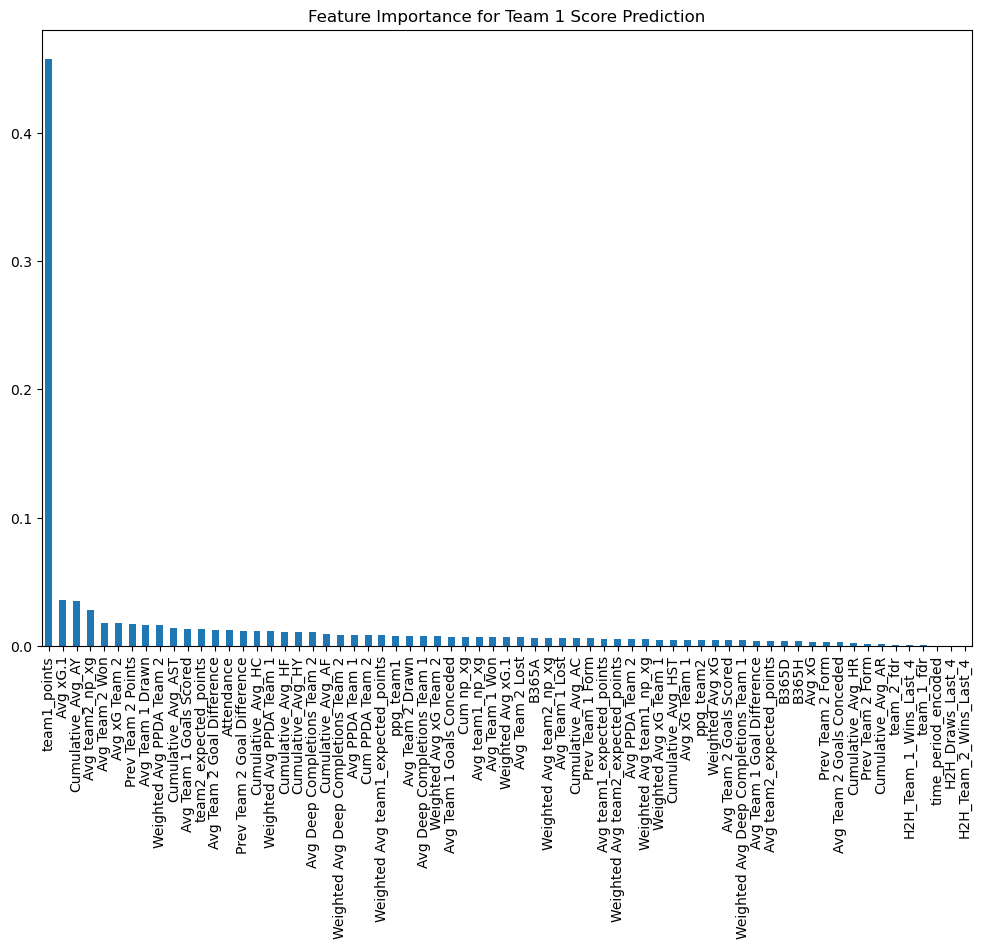

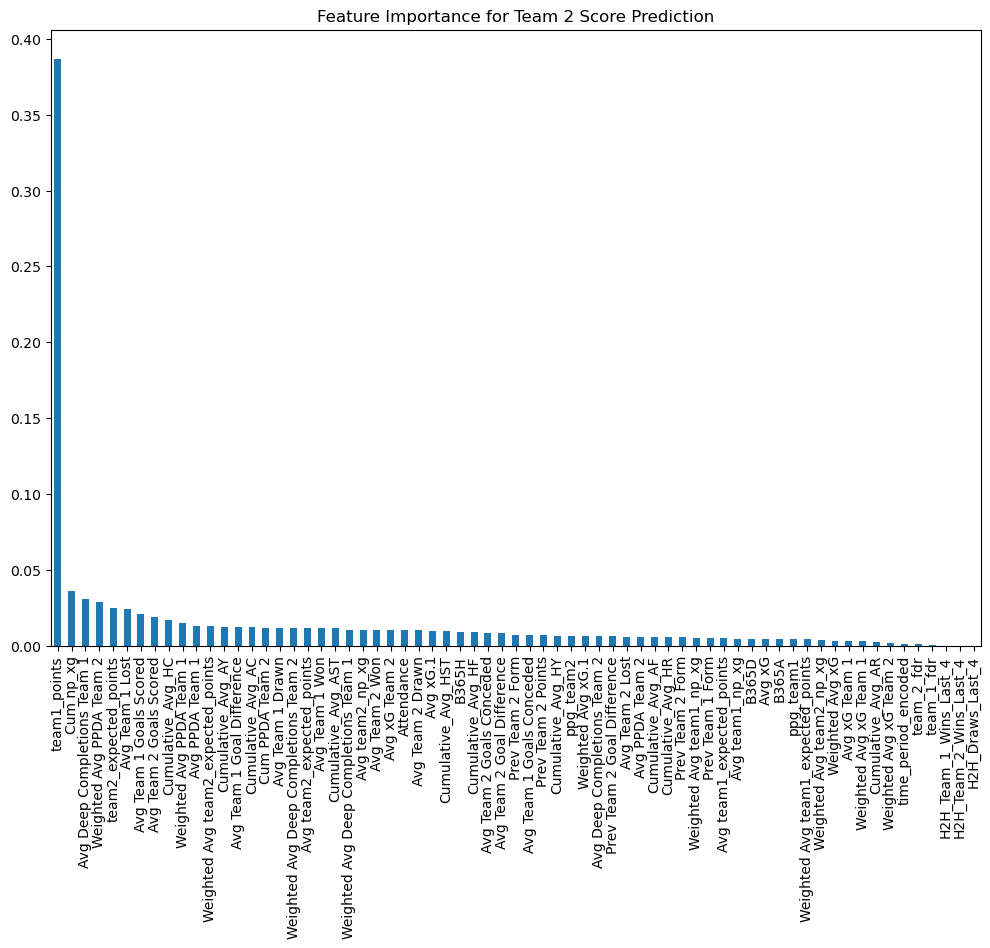

,Team 1 Score,Team 2 Score
Team 1 Score,1.000000,-0.018172
team1_points,0.679293,-0.567407
B365A,0.283619,-0.232307
team_2_fdr,0.270306,-0.199800
Avg Team 1 Won,0.254307,-0.140029
...,...,...
Avg team2_np_xg,-0.212986,0.131830
Avg xG.1,-0.215049,0.101889
Avg xG Team 2,-0.217523,0.128109
B365H,-0.232060,0.372733


In [641]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#Dropping the first column which is likely just an index or ID
data_cleaned = df

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# Selecting the target variables for correlation focus
correlation_with_target = correlation_matrix[['Team 1 Score', 'Team 2 Score']].sort_values(by='Team 1 Score', ascending=False)

# Prepare data for a Random Forest model to get feature importance
X = data_cleaned.drop(['Team 1 Score', 'Team 2 Score'], axis=1)
y_team1 = data_cleaned['Team 1 Score']
y_team2 = data_cleaned['Team 2 Score']

# Fit Random Forest for Team 1
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team1.fit(X, y_team1)
feature_importance_team1 = pd.Series(rf_team1.feature_importances_, index=X.columns)

# Fit Random Forest for Team 2
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team2.fit(X, y_team2)
feature_importance_team2 = pd.Series(rf_team2.feature_importances_, index=X.columns)

# Plotting feature importance
plt.figure(figsize=(12, 8))
feature_importance_team1.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 1 Score Prediction')
plt.show()

plt.figure(figsize=(12, 8))
feature_importance_team2.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 2 Score Prediction')
plt.show()

correlation_with_target


## Train models

In [643]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# # Selecting features based on importance and correlation
# selected_features = [
#     'Prev Team 1 Form','Prev Team 2 Form','Attendance','team1_points','Prev Team 2 Goal Difference',
# 'Prev Team 2 Points','Prev Team 2 Form', 'Temperature', 'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 
# 'H2H_Draws_Last_4','Cumulative_Avg_HST','Cumulative_Avg_AST','Cumulative_Avg_HF',	'Cumulative_Avg_AF',	
# 'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr','team_2_fdr', 'Cumulative_Avg_AY',	
# 'Cumulative_Avg_HR', 'Cumulative_Avg_AR','team2_expected_points', 
#  'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2', 
# 'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1', 
# 'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1', 'Weighted Avg Deep Completions Team 2', 
# 'Avg xG', 'Weighted Avg xG', 'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
# 'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg', 'Avg team1_np_xg', 'Avg team2_np_xg', 
# 'Weighted Avg team1_np_xg', 'Weighted Avg team2_np_xg',  'Avg team1_expected_points', 
# 'Avg team2_expected_points', 'Weighted Avg team1_expected_points', 'Weighted Avg team2_expected_points',
# 'Avg Team 1 Won', 'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn', 'Avg Team 1 Lost', 'Avg Team 2 Lost',
# 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded', 'Avg Team 2 Goals Conceded', 
# 'Avg Team 1 Goal Difference','Avg Team 2 Goal Difference', 'time_period_encoded', 'ppg_team1', 'ppg_team2'
# ]

# Preparing the data
X_selected = X

# Split the data into training and testing sets
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X_selected, y_team1, test_size=0.3, random_state=42)
X_train, X_test, y_train_team2, y_test_team2 = train_test_split(X_selected, y_team2, test_size=0.3, random_state=42)

# Initialize models
lr_team1 = LinearRegression()
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team1 = GradientBoostingRegressor(n_estimators=100, random_state=42)

lr_team2 = LinearRegression()
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team2 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models for Team 1
lr_team1.fit(X_train, y_train_team1)
rf_team1.fit(X_train, y_train_team1)
gb_team1.fit(X_train, y_train_team1)

# Train models for Team 2
lr_team2.fit(X_train, y_train_team2)
rf_team2.fit(X_train, y_train_team2)
gb_team2.fit(X_train, y_train_team2)

# Predict and evaluate for Team 1
y_pred_lr_team1 = lr_team1.predict(X_test)
y_pred_rf_team1 = rf_team1.predict(X_test)
y_pred_gb_team1 = gb_team1.predict(X_test)
rmse_lr_team1 = mean_squared_error(y_test_team1, y_pred_lr_team1, squared=False)
rmse_rf_team1 = mean_squared_error(y_test_team1, y_pred_rf_team1, squared=False)
rmse_gb_team1 = mean_squared_error(y_test_team1, y_pred_gb_team1, squared=False)

# Predict and evaluate for Team 2
y_pred_lr_team2 = lr_team2.predict(X_test)
y_pred_rf_team2 = rf_team2.predict(X_test)
y_pred_gb_team2 = gb_team2.predict(X_test)
rmse_lr_team2 = mean_squared_error(y_test_team2, y_pred_lr_team2, squared=False)
rmse_rf_team2 = mean_squared_error(y_test_team2, y_pred_rf_team2, squared=False)
rmse_gb_team2 = mean_squared_error(y_test_team2, y_pred_gb_team2, squared=False)

(rmse_lr_team1, rmse_rf_team1, rmse_gb_team1), (rmse_lr_team2, rmse_rf_team2, rmse_gb_team2)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

((1.7375270696655962, 0.7818430606129158, 0.8402558523419359),
 (2.0593943327069306, 0.7910315748318473, 0.7706563650012977))

## Grid Search CV

In [645]:
# from sklearn.model_selection import GridSearchCV

# # Setting up parameter grids for both models
# rf_param_grid = {
#     'n_estimators': [100, 200],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# gb_param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.1, 0.05],
#     'max_depth': [3, 5]
# }

# # Initialize GridSearchCV for Random Forest and Gradient Boosting for Team 1
# grid_search_rf_team1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team1 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# # Fit the grid search models for Team 1
# grid_search_rf_team1.fit(X_train, y_train_team1)
# grid_search_gb_team1.fit(X_train, y_train_team1)

# # Getting the best estimator parameters and their corresponding RMSE for Team 1
# best_rf_team1 = grid_search_rf_team1.best_estimator_
# best_gb_team1 = grid_search_gb_team1.best_estimator_
# best_rf_rmse_team1 = -grid_search_rf_team1.best_score_ ** 0.5
# best_gb_rmse_team1 = -grid_search_gb_team1.best_score_ ** 0.5

# # Repeat the process for Team 2
# grid_search_rf_team2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team2 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# # Fit the grid search models for Team 2
# grid_search_rf_team2.fit(X_train, y_train_team2)
# grid_search_gb_team2.fit(X_train, y_train_team2)

# # Getting the best estimator parameters and their corresponding RMSE for Team 2
# best_rf_team2 = grid_search_rf_team2.best_estimator_
# best_gb_team2 = grid_search_gb_team2.best_estimator_
# best_rf_rmse_team2 = -grid_search_rf_team2.best_score_ ** 0.5
# best_gb_rmse_team2 = -grid_search_gb_team2.best_score_ ** 0.5

# (best_rf_team1, best_gb_team1, best_rf_rmse_team1, best_gb_rmse_team1), (best_rf_team2, best_gb_team2, best_rf_rmse_team2, best_gb_rmse_team2)


Best Configurations for Team 1:
Random Forest: max_depth=10, max_features='sqrt'
Gradient Boosting: learning_rate=0.05



Best Configurations for Team 2:
Random Forest: max_features='sqrt', min_samples_split=5
Gradient Boosting: default parameters used in grid search


In [647]:
# # Adjusting parameter grids for both models with broader ranges
# rf_param_grid_adjusted = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['sqrt', 0.5],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# gb_param_grid_adjusted = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7]
# }

# # Re-initialize GridSearchCV with adjusted parameter grids for both models
# grid_search_rf_team1_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team1_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# # Re-fit the grid search models for Team 1
# grid_search_rf_team1_adjusted.fit(X_train, y_train_team1)
# grid_search_gb_team1_adjusted.fit(X_train, y_train_team1)

# # Getting the best estimator parameters and their corresponding RMSE for Team 1
# best_rf_team1_adjusted = grid_search_rf_team1_adjusted.best_estimator_
# best_gb_team1_adjusted = grid_search_gb_team1_adjusted.best_estimator_
# best_rf_rmse_team1_adjusted = -grid_search_rf_team1_adjusted.best_score_ ** 0.5
# best_gb_rmse_team1_adjusted = -grid_search_gb_team1_adjusted.best_score_ ** 0.5

# # Repeat the adjusted process for Team 2
# grid_search_rf_team2_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team2_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# # Re-fit the grid search models for Team 2
# grid_search_rf_team2_adjusted.fit(X_train, y_train_team2)
# grid_search_gb_team2_adjusted.fit(X_train, y_train_team2)

# # Getting the best estimator parameters and their corresponding RMSE for Team 2
# best_rf_team2_adjusted = grid_search_rf_team2_adjusted.best_estimator_
# best_gb_team2_adjusted = grid_search_gb_team2_adjusted.best_estimator_
# best_rf_rmse_team2_adjusted = -grid_search_rf_team2_adjusted.best_score_ ** 0.5
# best_gb_rmse_team2_adjusted = -grid_search_gb_team2_adjusted.best_score_ ** 0.5

# ((best_rf_team1_adjusted, best_gb_team1_adjusted, best_rf_rmse_team1_adjusted, best_gb_rmse_team1_adjusted),
#  (best_rf_team2_adjusted, best_gb_team2_adjusted, best_rf_rmse_team2_adjusted, best_gb_rmse_team2_adjusted))


Result
((RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, n_estimators=150, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.1781631869935918,
  1.224015556875125),
 (RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.2589750427168531,
  1.3489450632220956))

Random Forest seems to be consistently performing better than Gradient Boosting for both teams in terms of RMSE, indicating better handling of the dataset's features and noise.
The choice of parameters, particularly the depth and the number of estimators for the Random Forest, suggests a balance between model complexity and overfitting.

In [650]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load your data
data_path = 'modelling_table.csv'  # Update your path accordingly
data = pd.read_csv(data_path)

# Prepare data for training
X = data.drop(['Team 1 Score', 'Team 2 Score'], axis=1)  # Exclude target variables from features
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
rf_team1 = RandomForestRegressor(random_state=42)
gb_team1 = GradientBoostingRegressor(random_state=42)
rf_team2 = RandomForestRegressor(random_state=42)
gb_team2 = GradientBoostingRegressor(random_state=42)

# Define cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation predictions
y_pred_rf_team1 = cross_val_predict(rf_team1, X_scaled, y_team1, cv=cv, n_jobs=-1)
y_pred_gb_team1 = cross_val_predict(gb_team1, X_scaled, y_team1, cv=cv, n_jobs=-1)
y_pred_rf_team2 = cross_val_predict(rf_team2, X_scaled, y_team2, cv=cv, n_jobs=-1)
y_pred_gb_team2 = cross_val_predict(gb_team2, X_scaled, y_team2, cv=cv, n_jobs=-1)

# Calculate R^2 values for the predictions for each team
r2_rf_team1 = r2_score(y_team1, y_pred_rf_team1)
r2_gb_team1 = r2_score(y_team1, y_pred_gb_team1)
r2_rf_team2 = r2_score(y_team2, y_pred_rf_team2)
r2_gb_team2 = r2_score(y_team2, y_pred_gb_team2)

# Print the R^2 values to evaluate model performance
print("R^2 values for Team 1 - Random Forest:", r2_rf_team1)
print("R^2 values for Team 1 - Gradient Boosting:", r2_gb_team1)
print("R^2 values for Team 2 - Random Forest:", r2_rf_team2)
print("R^2 values for Team 2 - Gradient Boosting:", r2_gb_team2)


R^2 values for Team 1 - Random Forest: 0.5005359444405274
R^2 values for Team 1 - Gradient Boosting: 0.4761634471515028
R^2 values for Team 2 - Random Forest: 0.33117688661500255
R^2 values for Team 2 - Gradient Boosting: 0.17647492512311436


Random Forest: 
𝑅
2
=
0.2049
R 
2
 =0.2049
This model explains approximately 20.49% of the variance in the Team 1 scores, which suggests it has some predictive power, though there is room for improvement.
Gradient Boosting: 
𝑅
2
=
0.1770
R 
2
 =0.1770
Slightly lower than the Random Forest, explaining about 17.70% of the variance. It performs decently, but like the Random Forest, it could benefit from further optimization or additional relevant features.

Recommendations:

Feature Reevaluation:

For Team 2, both models underperform significantly. This may be an indication to revisit the features being used — considering more relevant or additional predictive features could help.

Model Complexity: Especially for Team 2, the models might be too complex or not properly tailored to the nuances of the data. Simplifying the models or adjusting regularization might help.

Cross-validation and Further Tuning: Using cross-validation to tune the models can provide a more robust understanding of their performance and help avoid overfitting.


Alternative Modeling Techniques: Considering other modeling techniques that might capture different types of patterns in the data could be beneficial, such as Support Vector Machines, Neural Networks, or ensemble methods like Stacking.

## Stacking

In [654]:
data.columns

Index(['Unnamed: 0', 'Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form',
       'Prev Team 2 Form', 'Attendance', 'team1_points',
       'Prev Team 2 Goal Difference', 'Prev Team 2 Points',
       'Prev Team 2 Form.1', 'Cumulative_Avg_HST', 'Cumulative_Avg_AST',
       'Cumulative_Avg_HF', 'Cumulative_Avg_AF', 'Cumulative_Avg_HC',
       'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr', 'team_2_fdr',
       'Cumulative_Avg_AY', 'Cumulative_Avg_HR', 'Cumulative_Avg_AR',
       'team2_expected_points', 'B365H', 'B365D', 'B365A',
       'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4', 'H2H_Draws_Last_4',
       'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2',
       'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2',
       'Weighted Avg PPDA Team 1', 'Weighted Avg PPDA Team 2',
       'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg x

In [655]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your data
data_path = 'modelling_table.csv'  # Update your path accordingly
data = pd.read_csv(data_path)

# Prepare data for training
X = data.drop(['Team 1 Score', 'Team 2 Score'], axis=1)  # Exclude target variables from features
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()

# Define cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the stacking estimator
estimators = [
    ('rf', rf),
    ('gb', gb)
]
stacked_model_team1 = StackingRegressor(estimators=estimators, final_estimator=lr)
stacked_model_team2 = StackingRegressor(estimators=estimators, final_estimator=lr)

# Perform cross-validation and assess performance using R^2 metric
scores_team1 = cross_val_score(stacked_model_team1, X_scaled, y_team1, scoring='r2', cv=cv, n_jobs=-1)
scores_team2 = cross_val_score(stacked_model_team2, X_scaled, y_team2, scoring='r2', cv=cv, n_jobs=-1)

# Calculate mean R^2 scores
mean_r2_team1 = np.mean(scores_team1)
mean_r2_team2 = np.mean(scores_team2)

print("Mean R^2 Score for Team 1:", mean_r2_team1)
print("Mean R^2 Score for Team 2:", mean_r2_team2)


Mean R^2 Score for Team 1: 0.4898632786983307
Mean R^2 Score for Team 2: 0.28877858587304717
